In [48]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

In [62]:
A = pd.read_csv('A.csv', header=None)

In [63]:
A = A[:9]

In [64]:
Psi = pd.read_csv('Psi.csv')

In [65]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,72.0,85.0,9.0,2.0,4.4,6,0,0,0,1,5,0,0,0,0,7,1,3,3,4
1,640.0,69.0,25.0,52.0,17.0,8,4,6,2,3,6,7,7,0,6,4,7,6,3,8
2,42.0,5.6,3.4,2.5,5.0,5,9,5,5,6,7,2,6,8,7,5,5,4,6,0
3,371.0,34.0,3.6,0.4,20.0,3,3,8,7,8,2,6,4,7,5,0,4,5,8,9
4,250.0,8.0,1.0,3.2,6.5,0,8,3,8,4,3,5,5,3,0,3,3,2,4,0
5,545.0,100.0,5.0,33.0,56.5,7,6,9,1,5,0,9,9,4,4,9,8,8,5,6
6,360.7,35.6,7.7,19.1,39.5,0,7,7,0,9,8,4,8,9,9,8,2,0,9,5
7,57.0,5.9,3.0,3.2,4.0,4,5,2,6,2,9,3,3,6,3,0,9,9,2,0
8,334.0,4.0,12.0,2.0,67.0,9,2,4,9,7,4,8,2,5,8,6,6,7,7,7


In [66]:
referees = A.values[:,5:20].T

In [67]:
distances = np.zeros((15, 15))

for i in range(15):
    for j in range(15):
        ans = 0
        for k in range(9):
            if referees[i][k] != 0 and referees[j][k] != 0:
                ans += (referees[i][k]-referees[j][k])**2
        
        distances[i,j] = ans
        
        distances[i,i] = 10**6

In [70]:
for i in range(15):
    d = [(c, i) for i, c in enumerate(distances[i])]
    d.sort()
    for k in range(9):
        if referees[i][k] == 0:
            ans = 0
            n = 0
            for c, j in d:
                if referees[j][k] != 0 and n < 3:
                    ans += referees[j][k]
                    n += 1
                referees[i][k] = ans/3
                
                
            

In [71]:
#A = A[1:-1]
#B = A.values[:,:5]
#C = A.values[:,5:]
#for i in range(C.shape[1]):
#    for j in range(C.shape[0]):
#        if C[j,i] == 0:
#            C[j,i] = 1/2*(C[j,(i+1)%15]+C[j,(i-1)%15])

In [74]:
A.values[:, 0:5].shape, referees.shape

((9, 5), (15, 9))

In [75]:
A = np.hstack([A.values[:,0:5], referees.T])
A=pd.DataFrame(A)

In [76]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,72.0,85.0,9.0,2.0,4.4,6.000000,5.333333,4.0,2.666667,1.0,5.0,5.666667,5.444444,2.666667,3.333333,7.000000,1.0,3.0,3.0,4.000000
1,640.0,69.0,25.0,52.0,17.0,8.000000,4.000000,6.0,2.000000,3.0,6.0,7.000000,7.000000,4.000000,6.000000,4.000000,7.0,6.0,3.0,8.000000
2,42.0,5.6,3.4,2.5,5.0,5.000000,9.000000,5.0,5.000000,6.0,7.0,2.000000,6.000000,8.000000,7.000000,5.000000,5.0,4.0,6.0,3.666667
3,371.0,34.0,3.6,0.4,20.0,3.000000,3.000000,8.0,7.000000,8.0,2.0,6.000000,4.000000,7.000000,5.000000,5.000000,4.0,5.0,8.0,9.000000
4,250.0,8.0,1.0,3.2,6.5,3.333333,8.000000,3.0,8.000000,4.0,3.0,5.000000,5.000000,3.000000,3.777778,3.000000,3.0,2.0,4.0,3.333333
5,545.0,100.0,5.0,33.0,56.5,7.000000,6.000000,9.0,1.000000,5.0,7.0,9.000000,9.000000,4.000000,4.000000,9.000000,8.0,8.0,5.0,6.000000
6,360.7,35.6,7.7,19.1,39.5,7.000000,7.000000,7.0,9.000000,9.0,8.0,4.000000,8.000000,9.000000,9.000000,8.000000,2.0,5.0,9.0,5.000000
7,57.0,5.9,3.0,3.2,4.0,4.000000,5.000000,2.0,6.000000,2.0,9.0,3.000000,3.000000,6.000000,3.000000,6.666667,9.0,9.0,2.0,4.666667
8,334.0,4.0,12.0,2.0,67.0,9.000000,2.000000,4.0,9.000000,7.0,4.0,8.000000,2.000000,5.000000,8.000000,6.000000,6.0,7.0,7.0,7.000000


In [77]:
Psi

,Unnamed: 0,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Северилов,Колесов,Бишук
0,"Калорийность, кКал",6,9,3,8,7,10,10,3,1,10,10,7,8,10,10
1,"Цена 100г, руб.",7,9,6,3,8,10,10,8,10,10,4,8,10,10,10
2,Белки,0,8,9,5,7,9,7,9,9,10,10,6,10,8,10
3,Жиры,9,9,7,7,5,9,9,7,2,10,1,9,10,10,10
4,Углеводы,5,9,7,7,6,6,9,5,3,10,8,6,8,10,10
5,Стрижов,2,1,10,4,5,0,3,5,4,3,8,5,8,8,8
6,Гребенькова,0,9,3,5,5,5,10,10,10,5,5,4,10,8,8
7,Михеев,2,1,10,6,5,1,3,3,6,4,3,5,7,8,5
8,Тихонов,2,1,2,4,5,1,3,3,7,5,5,4,5,5,5
9,Панченко,2,1,8,5,6,1,3,3,8,7,4,5,10,5,5


In [78]:
A = np.array(A.values, dtype=float)

In [79]:
P = np.array(Psi.values[:, 1:], dtype = float)
P.T.shape

(15, 20)

In [80]:
w0 = P.T

In [81]:
q0 = A[:,5:].T

In [82]:
q0.shape, w0.shape, A.shape, P.shape

((15, 9), (15, 20), (9, 20), (20, 15))

In [83]:
q1 = (A@(w0.T)).T

In [84]:
A_pinv = np.linalg.pinv(A)

In [85]:
w1 = (A_pinv@(q0.T)).T

In [86]:
n = q0.shape[1]
m = w0.shape[1]

In [87]:
def find_alpha(q0, q1, w0, w1):
    def f(a):
        q = a*q0 + (1-a)*q1
        w = (1-a)*w0 + a*w1
        return 1/n*np.linalg.norm(q-q0,1)**2 + 1/m*np.linalg.norm(w-w0,1)**2
    return minimize_scalar(f, bounds=(0, 1), method='Bounded').x

In [88]:
rangs = []
for k in range(q0.shape[0]):
    a = find_alpha(q0[k], q1[k], w0[k], w1[k])
    q = a*q0[k] + (1-a)*q1[k]
    w = (1-a)*w0[k] + a*w1[k]
    rangs.append(1/n*np.linalg.norm(q-q0[k])**2 + 1/m*np.linalg.norm(w-w0[k])**2)

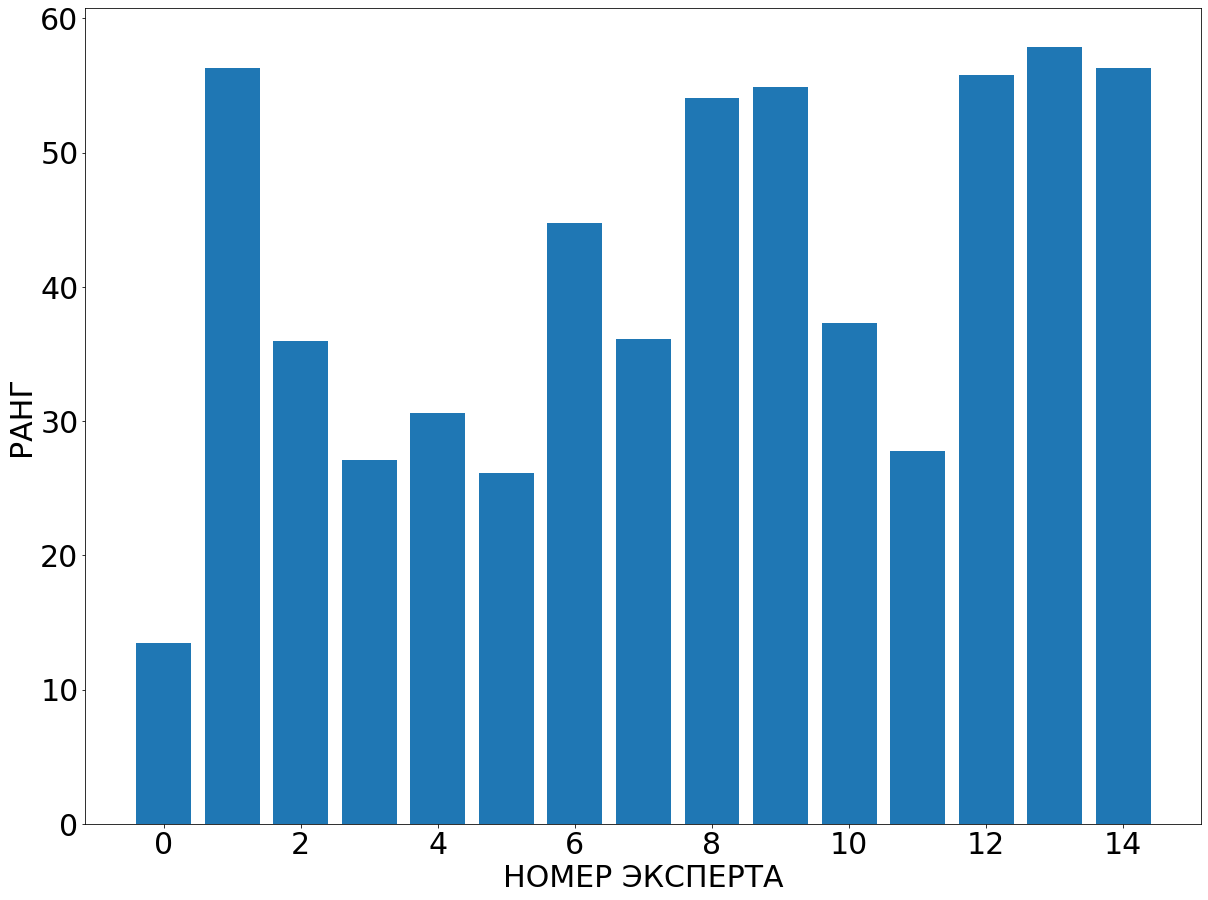

In [89]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.figure(figsize=[20,15])
plt.bar(list(range(len(rangs))), rangs)
plt.xlabel('НОМЕР ЭКСПЕРТА')
plt.ylabel('РАНГ')
plt.savefig('ratings.pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [90]:
weights = rangs/sum(rangs)
weights

array([0.02190467, 0.09166842, 0.05854122, 0.04406758, 0.04976216,
       0.04254781, 0.07288401, 0.05872065, 0.08802634, 0.08929333,
       0.06075767, 0.04521725, 0.0907621 , 0.0941536 , 0.09169318])

In [94]:
prediction = np.zeros(9)

In [95]:
for i in range(q0.shape[0]):
    prediction += weights[i]*q0[i]

In [96]:
prediction

array([3.89163873, 5.31509514, 5.6653997 , 5.85248802, 4.10235931,
       6.37022886, 7.08298329, 4.84582935, 5.95688177])

In [97]:
for i, c in enumerate(prediction):
    print(i,c)

0 3.8916387284256904
1 5.315095141519171
2 5.66539969595859
3 5.852488020013292
4 4.1023593073019855
5 6.370228856161051
6 7.082983289842228
7 4.845829348563843
8 5.956881765515074


In [98]:
rating = np.zeros(9)

In [100]:
rating[6] = 1
rating[5] = 2
rating[8] = 3
rating[3] = 4
rating[2] = 5
rating[1] = 6
rating[7] = 7
rating[4] = 8
rating[0] = 9

In [101]:
my_rating=rating

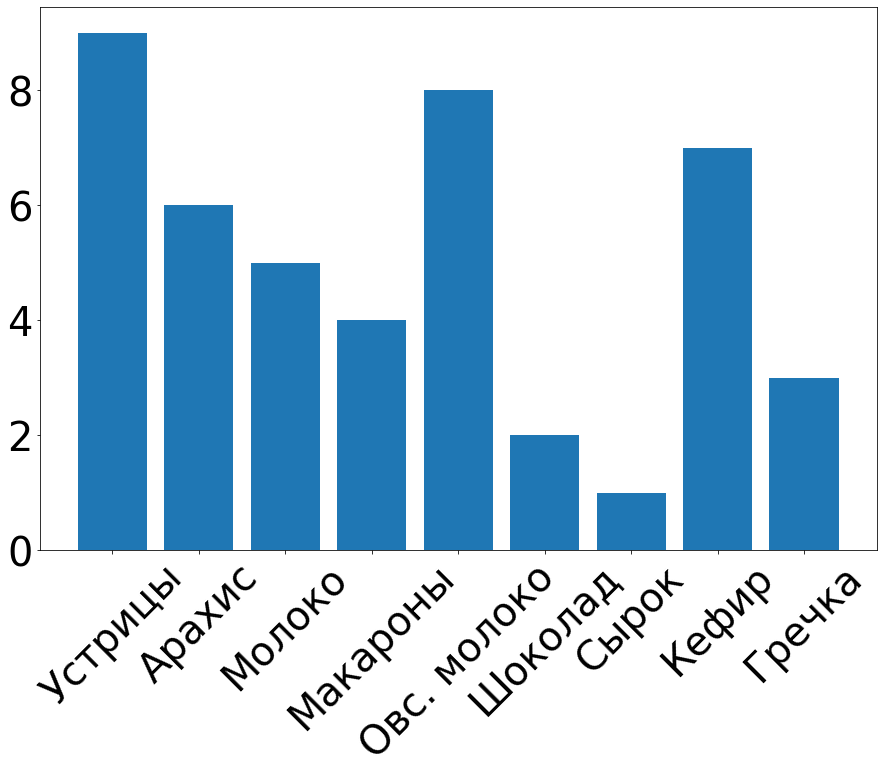

In [104]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 40

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

value = tuple(my_rating)
position = np.arange(9)

fig, ax = plt.subplots()
fig.figsize=[20,15]

ax.bar(position, value)

#  Устанавливаем позиции тиков:
ax.set_xticks(position)

#  Устанавливаем подписи тиков
ax.set_xticklabels([r'Устрицы', r'Арахиc', r'Молоко' , r'Макароны',\
         r'Овс. молоко', r'Шоколад', r'Сырок',\
        r'Кефир', r'Гречка'])
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelrotation = 45)    #  Поворот подписей
fig.set_figwidth(15)
fig.set_figheight(10)

plt.savefig('food_ratings.pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [105]:
my_rating

array([9., 6., 5., 4., 8., 2., 1., 7., 3.])

In [126]:
my_rating = rating
svyato_rating = np.array([9,5,4,6,7,3,1,8,2])
anton_rating = np.array([9,6,7,4,8,2,1,3,5])
alex_rating = np.array([9,4,5,6,7,1,2,8,3])
petr_rating = np.array([9,4,5,6,7,2,1,8,3])
avg_rating = np.array([9,5,4,6,8,2,1,7,3])

In [107]:
import matplotlib.pyplot as plt

In [108]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

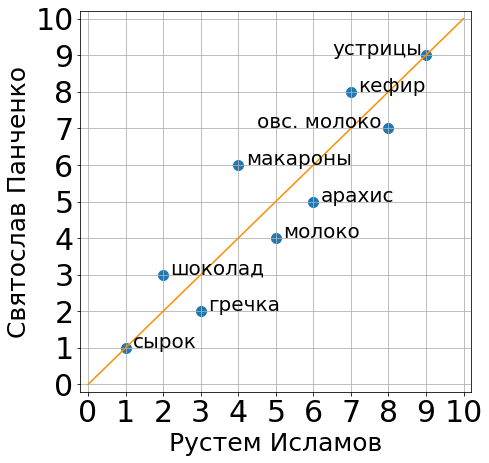

In [121]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, svyato_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Святослав Панченко', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'сырок', fontsize=20)
plt.text(2.2, 3.0, 'шоколад', fontsize=20)
plt.text(3.2, 2.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 4.0, 'молоко', fontsize=20)
plt.text(6.2, 5.0, 'арахис', fontsize=20)
plt.text(7.2, 8.0, 'кефир', fontsize=20)
plt.text(4.5, 7.0, 'овс. молоко', fontsize=20)
plt.text(6.5, 9.0, 'устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_svyato.pdf',bbox_inches='tight', pad_inches=0.5)

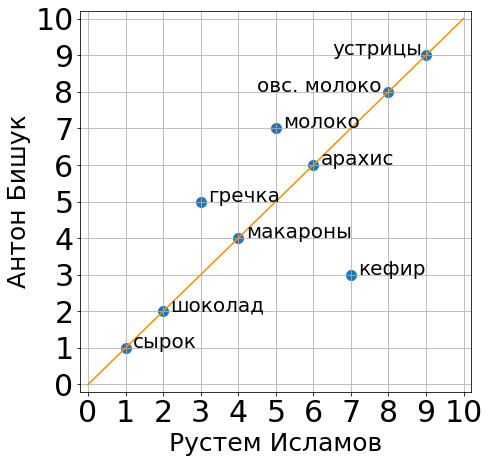

In [123]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, anton_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Антон Бишук', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'сырок', fontsize=20)
plt.text(2.2, 2.0, 'шоколад', fontsize=20)
plt.text(3.2, 5.0, 'гречка', fontsize=20)
plt.text(4.2, 4.0, 'макароны', fontsize=20)
plt.text(5.2, 7.0, 'молоко', fontsize=20)
plt.text(6.2, 6.0, 'арахис', fontsize=20)
plt.text(7.2, 3.0, 'кефир', fontsize=20)
plt.text(4.5, 8.0, 'овс. молоко', fontsize=20)
plt.text(6.5, 9.0, 'устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_anton.pdf', bbox_inches='tight',pad_inches=0.5)

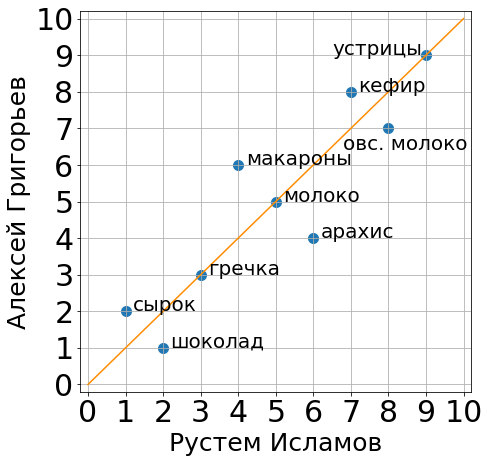

In [133]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, alex_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Алексей Григорьев', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 2.0, 'сырок', fontsize=20)
plt.text(2.2, 1.0, 'шоколад', fontsize=20)
plt.text(3.2, 3.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 5.0, 'молоко', fontsize=20)
plt.text(6.2, 4.0, 'арахис', fontsize=20)
plt.text(7.2, 8.0, 'кефир', fontsize=20)
plt.text(6.8, 6.4, 'овс. молоко', fontsize=20)
plt.text(6.5, 9.0, 'устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_alex.pdf',bbox_inches='tight',pad_inches=0.5)

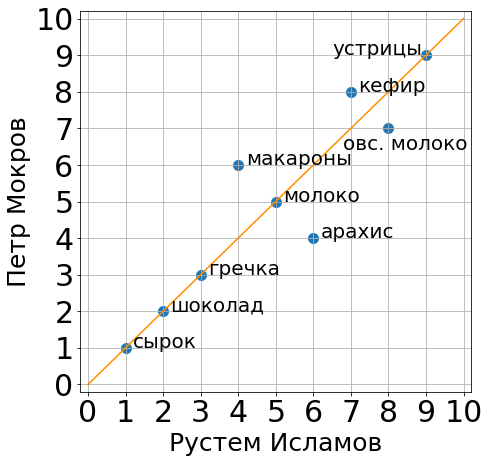

In [131]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, petr_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Петр Мокров', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'сырок', fontsize=20)
plt.text(2.2, 2.0, 'шоколад', fontsize=20)
plt.text(3.2, 3.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 5.0, 'молоко', fontsize=20)
plt.text(6.2, 4.0, 'арахис', fontsize=20)
plt.text(7.2, 8.0, 'кефир', fontsize=20)
plt.text(6.8, 6.4, 'овс. молоко', fontsize=20)
plt.text(6.5, 9.0, 'устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_petr.pdf',bbox_inches='tight',pad_inches=0.5)

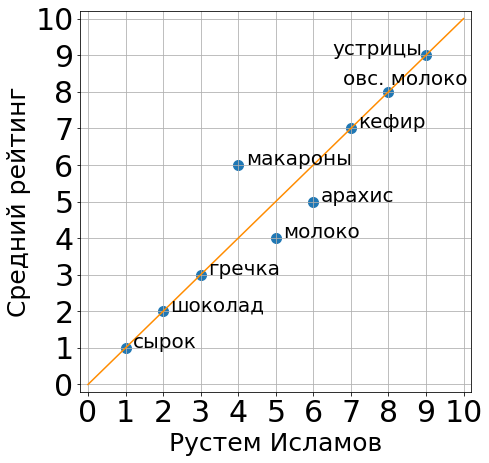

In [132]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(my_rating, avg_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=25)
plt.ylabel(r'Средний рейтинг', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'сырок', fontsize=20)
plt.text(2.2, 2.0, 'шоколад', fontsize=20)
plt.text(3.2, 3.0, 'гречка', fontsize=20)
plt.text(4.2, 6.0, 'макароны', fontsize=20)
plt.text(5.2, 4.0, 'молоко', fontsize=20)
plt.text(6.2, 5.0, 'арахис', fontsize=20)
plt.text(7.2, 7.0, 'кефир', fontsize=20)
plt.text(6.8, 8.2, 'овс. молоко', fontsize=20)
plt.text(6.5, 9.0, 'устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_avg.pdf',bbox_inches='tight',pad_inches=0.5)